<a href="https://colab.research.google.com/github/therealellam/WEEK-4-IP/blob/main/WEEK_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [2]:
#importing libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Loading Data**

In [3]:
#loading data into our environment
df=pd.read_csv('/content/Autolib_dataset (2).csv')

#Viewing the first 5 rows of the dataset
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


# **Understanding the Data**

In [4]:
 #obtaining the size of the dataset
 df.shape

(5000, 25)

In [5]:
#more data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# **Data Cleaning** 

# **Validity**

In [6]:
#Irrelevant Data
# we will drop the 'Displayed Comment', 'Geo point' and 'Scheduled at' columns from the dataset below
# since we will not need them in our analysis
df.drop(["Displayed comment", "Geo point", "Scheduled at"], axis = 1, inplace = True) 
  
# Display the resulting dataframe
df 

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


# **Completeness**

In [7]:
#Checking/ Counting Missing Values 

# Checking if there is any missing value in dataframe as a whole
df.isnull()

# Checking if there is any missing value across each column

df.isnull().any()


# checking to see if we have any missing values at all

print(df.isnull().values.any())


False


**Duplicates**

In [8]:
#checking for duplicates

def x():
  x = df.duplicated()
  return x.sum()

x()

0

# **Data Preparation**

In [9]:
#mapping the lowering function to all columns

df.columns= map(str.lower, df.columns)
df.head()

,address,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,postal code,public name,rental status,slots,station type,status,subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


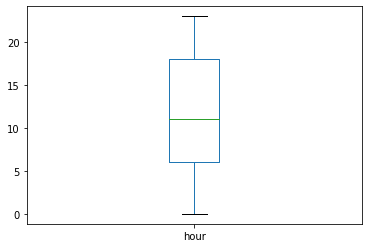

In [10]:
# Visualising outliers using box plot.
import matplotlib.pyplot as plt
df.boxplot(column =['hour'], grid = False)

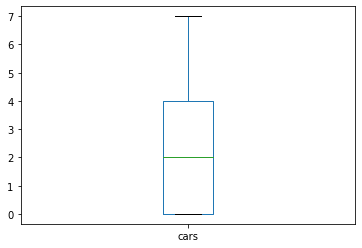

In [11]:
import matplotlib.pyplot as plt
df.boxplot(column =['cars'], grid = False)

# **Data Analysis**

In [12]:
#subsetting the data frame to only select only stations in Paris
df1 = df[(df.city == 'Paris')]
df1.head()


,address,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,postal code,public name,rental status,slots,station type,status,subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2


In [13]:
df1.shape

(2816, 22)

**Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018**

In [14]:
#most popular hour of the day for picking shared electric blue car in Paris
x= df1.groupby(['hour'])['bluecar counter'].sum().sort_values(ascending = False)
print(x)


hour
21    268
6     260
12    250
9     250
3     242
5     235
8     234
10    232
7     225
2     221
15    218
4     209
16    208
1     207
13    207
0     206
11    201
22    197
19    193
18    192
23    191
17    187
14    163
20    149
Name: bluecar counter, dtype: int64


# **What is the most popular hour for returning cars?**



In [15]:
#most popular hour for returning cars
y=df.groupby(['hour'])['slots'].sum().sort_values(ascending = True)
y

hour
17    349
0     355
12    368
10    370
1     378
19    379
22    382
9     383
18    392
13    399
11    401
4     406
20    409
8     409
5     411
15    415
6     423
3     426
16    427
7     428
23    433
21    438
2     440
14    441
Name: slots, dtype: int64

# **What station is the most popular?**
*Overall*

In [16]:
z=df.groupby(['public name'])['id'].count().sort_values(ascending=False)
z

public name
Paris/Porte de Montrouge/8    13
Paris/Courcelles/69           11
SÃ¨vres/WolfenbÃ¼ttel/1       11
Paris/Voltaire/182            11
Paris/Grenelle 31/Parking     11
                              ..
Paris/Lecourbe/336             1
Paris/Porte Pouchet/6          1
Meudon/Ponceau/2               1
Paris/Pirogues de Bercy/44     1
Paris/Jean Veber/3             1
Name: id, Length: 1105, dtype: int64

In [18]:
w= df.groupby(['postal code'])['bluecar counter'].count().sort_values(ascending=False)
w

postal code
75015    274
75016    236
75017    221
75011    180
75020    169
        ... 
75116      5
91400      4
93310      4
92110      4
94100      2
Name: bluecar counter, Length: 107, dtype: int64